<a href="https://colab.research.google.com/github/txusser/Master_IA_Sanidad/blob/main/Modulo_2/2_3_4_Proyecto_Arboles_de_decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árboles de decisión

## Descripción del proyecto

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Exploración y preprocesado

In [3]:
# Como siempre, nuestra primera tarea es la de revisar los datos y hacer un
# poco de limpieza
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(data=data.data, columns=data.feature_names)
mvs = df.isnull().sum() 
print("Número de valores perdidos por variable:\n",  mvs)

Número de valores perdidos por variable:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


Clases objetivo: ['malignant' 'benign']


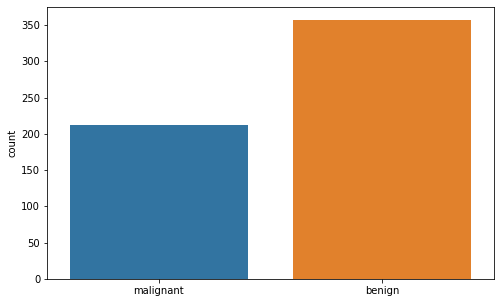

In [4]:
# El objetivo del proyecto es obtener una buena precisión clasificando
# los ejemplo en el conjunto de pruba en las dos categorías que expresan
# si el tumor es maligno o benigno
print("Clases objetivo:", data.target_names)

# Separamos los conjuntos de datos en características y variable objetivo
X, y = data.data, data.target

fig = plt.figure(1, figsize=(8, 5))
ax = fig.add_subplot(111)
sns.countplot(x=data.target, ax=ax)
ax.set_xticklabels(data.target_names)  
plt.show()

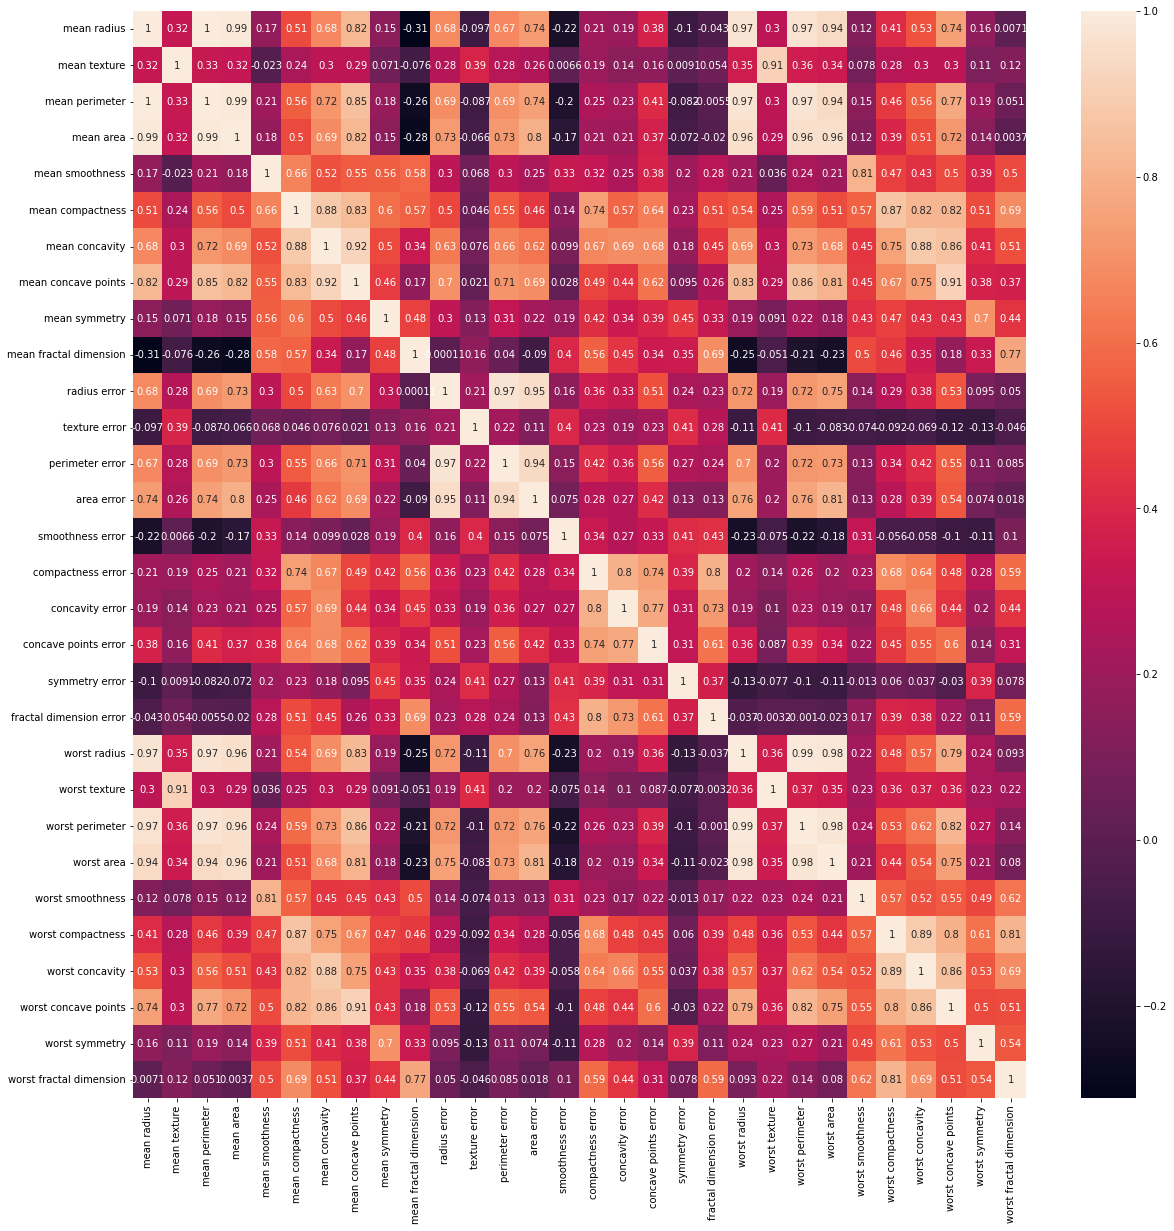

In [5]:
# Estudiamos posibles correlaciones entre variables
fig = plt.figure(1, figsize=(20, 20))
ax = fig.add_subplot(111)
sns.heatmap(df.corr(), annot=True, ax=ax)
plt.show()

In [6]:
# En el gráfico anterior podemos comprobar que hay varias variables que presentan
# una correlación alta, vamos a ver cómo podemos descartarlas
corr = df.corr()
def find_lc_cols(df, thres):
  """
  Encuentra las variables con una correlación mayor que el umbral (thres)
  """ 
  columns = np.full((corr.shape[0],), True, dtype=bool)
  for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
      if abs(corr.iloc[i,j]) >= thres:
        if columns[j]: columns[j] = False
  
  return columns

lc_cols = find_lc_cols(df, thres=0.90)
print("Variable/s con baja (<90%) correlación:", df.columns[lc_cols].tolist())
s_cols = df.columns[lc_cols]
df_s = df[s_cols]
print("Variables seleccionadas:", len(df_s.columns))
print("De un total de:", len(df.columns))
print("Dataset final:", df_s)

Variable/s con baja (<90%) correlación: ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst symmetry', 'worst fractal dimension']
Variables seleccionadas: 20
De un total de: 30
Dataset final:      mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...  

In [7]:
# Tras depurar nuestro dataset podemos proceder a crear los conjuntos de 
# entrenamiento y prueba

from sklearn.model_selection import train_test_split
X = df_s[df_s.columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(" - X_train:", X_train.shape)
print(" - X_test:", X_test.shape)
print(" - y_train:", y_train.shape)
print(" - y_test:", y_test.shape)

 - X_train: (455, 20)
 - X_test: (114, 20)
 - y_train: (455,)
 - y_test: (114,)


## Árbol de decisión


In [8]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=2)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

La precisión del modelo es de: 91.23


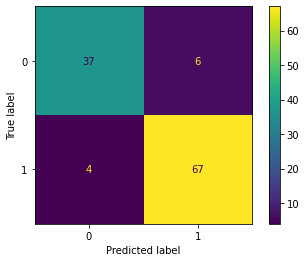

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
acc = accuracy_score(y_test, y_test_pred) * 100
print("La precisión del modelo es de: {:0.2f}".format(acc))

# Calculamos la matriz de confusión
# Recuerda que en el conjunto de prueba tenemos 114 sujetos
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)  

Los resultados obtenidos nos indican que nuestro modelo tiene una buenca precisión para la clasificación > 91%
Además, consigue identificar correctamente 37 casos benignos y 67 caos malignos, con una total de 6 falsos positivos y 4 falsos negativos.

## Aplicar Modelo de Regresión Logística

In [12]:
# Simplemente hemos de importar el modelo adecuado y aplicarlo sobre los datos preparados
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_test_pred) * 100
print("La precisión del modelo (LogReg) es de: {:0.2f}".format(acc))

La precisión del modelo (LogReg) es de: 95.61
